In [9]:
# https://www.tensorflow.org/api_guides/python/array_ops
import tensorflow as tf
import numpy as np
import pprint

tf.set_random_seed(777) # for reproducibility

pp = pprint.PrettyPrinter(indent = 4)
sess = tf.InteractiveSession()

### Simple Array

In [11]:
t = np.array([0. ,1. ,2. ,3. ,4. ,5. ,6.])
pp.pprint(t)

array([0., 1., 2., 3., 4., 5., 6.])


In [13]:
print(t.ndim) # rank
print(t.shape) # shape
print(t[0], t[1], t[-1])
print(t[2:5], t[4:-1])
print(t[:2], t[:3])

1
(7,)
0.0 1.0 6.0
[2. 3. 4.] [4. 5.]
[0. 1.] [0. 1. 2.]


### 2D Array

In [15]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
pp.pprint(t)

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])


In [16]:
print(t.ndim)
print(t.shape)

2
(4, 3)


### Shape, Rank, Axis

In [17]:
t = tf.constant([1,2,3,4]) # rank = 1
tf.shape(t).eval() # shape = [4]

array([4])

In [18]:
t = tf.constant([[1,2],
                 [3,4]]) # rank = 2, the number of [
tf.shape(t).eval()

array([2, 2])

In [19]:
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
                  ,[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]) # rank = 4, the number of [
tf.shape(t).eval()

array([1, 2, 3, 4])

In [21]:
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

[[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]

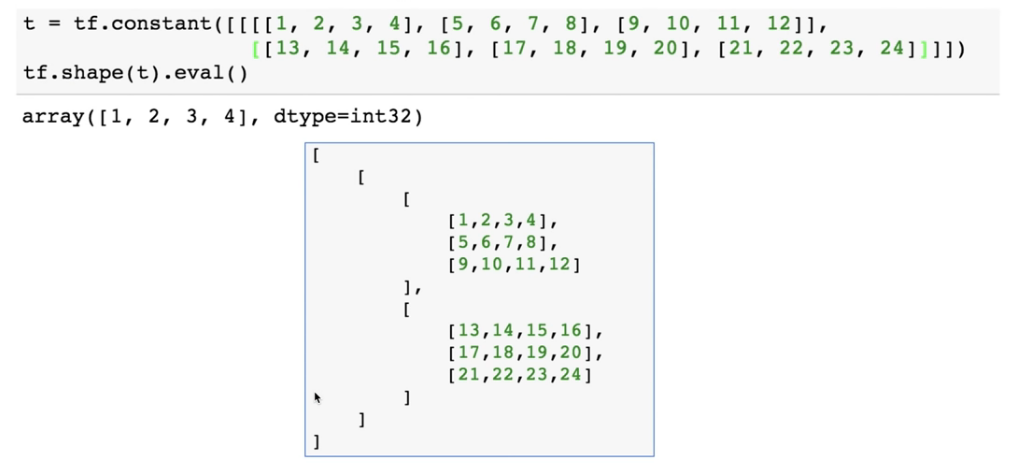

### Matmul VS multiply

In [22]:
matrix1 = tf.constant([[1., 2.],[3., 4.]])
matrix2 = tf.constant([[1.],[2.]])
print("Metrix 1 shape", matrix1.shape)
print("Metrix 2 shape", matrix2.shape)

Metrix 1 shape (2, 2)
Metrix 2 shape (2, 1)


In [23]:
tf.matmul(matrix1, matrix2).eval()

array([[ 5.],
       [11.]], dtype=float32)

In [24]:
(matrix1*matrix2).eval()

array([[1., 2.],
       [6., 8.]], dtype=float32)

### Watch out broadcasting

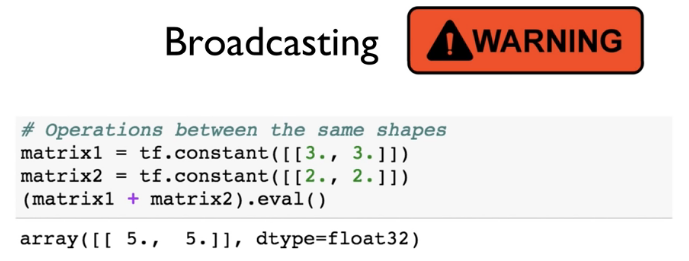

In [25]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.],[2.]])
(matrix1+matrix2).eval()

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [26]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1+matrix2).eval()

array([[5., 5.]], dtype=float32)

In [27]:
matrix1 = tf.constant([[1., 2.]])
matrix2 = tf.constant(3.)
(matrix1+matrix2).eval()

array([[4., 5.]], dtype=float32)

In [28]:
matrix1 = tf.constant([[1., 2.]])
matrix2 = tf.constant([3.,4.])
(matrix1+matrix2).eval()

array([[4., 6.]], dtype=float32)

In [30]:
matrix1 = tf.constant([[1., 2.]])
matrix2 = tf.constant([[3.],[4.]])
(matrix1+matrix2).eval()

array([[4., 5.],
       [5., 6.]], dtype=float32)

### Random values for variable initializations

In [32]:
tf.reduce_mean([1,2], axis = 0).eval()

1

In [33]:
x = [[1., 2.],
     [3., 4.]]

tf.reduce_mean(x).eval()

2.5

In [34]:
tf.reduce_mean(x, axis = 0).eval()

array([2., 3.], dtype=float32)

In [35]:
tf.reduce_mean(x, axis = 1).eval()

array([1.5, 3.5], dtype=float32)

In [36]:
tf.reduce_mean(x, axis = -1).eval()

array([1.5, 3.5], dtype=float32)

In [40]:
x = [[1., 2.],
     [3., 4.]]

tf.reduce_sum(x).eval()

10.0

In [41]:
tf.reduce_sum(x, axis = 0).eval()

array([4., 6.], dtype=float32)

In [42]:
tf.reduce_sum(x, axis = -1).eval()

array([3., 7.], dtype=float32)

In [43]:
tf.reduce_mean(tf.reduce_sum(x, axis = -1)).eval()

5.0

### Argmax with axis

In [44]:
x = [[0, 1, 2],
     [2, 1, 0]]
tf.argmax(x, axis=0).eval()

array([1, 0, 0], dtype=int64)

In [47]:
tf.argmax(x, axis = 1).eval()

array([2, 0], dtype=int64)

In [51]:
tf.argmax(x, axis = -1).eval()

array([2, 0], dtype=int64)

### Reshape, squeeze, expand_dims

In [52]:
t = np.array([[[0, 1, 2], 
               [3, 4, 5]],
              
              [[6, 7, 8], 
               [9, 10, 11]]])
t.shape

(2, 2, 3)

In [58]:
tf.reshape(t, shape = [-1,3]).eval()

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [59]:
tf.reshape(t, shape = [-1,1,3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [60]:
tf.squeeze([[0], [1], [2]]).eval()

array([0, 1, 2])

In [65]:
tf.expand_dims([0, 1, 2], 1).eval()

array([[0],
       [1],
       [2]])

### One hot

In [68]:
tf.one_hot([[0], [1], [2], [3]], depth = 3).eval()

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[0., 0., 0.]]], dtype=float32)

In [71]:
t = tf.one_hot([[0], [1], [2], [3]], depth = 3).eval()

In [72]:
tf.reshape(t, shape = [-1,3]).eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)

### Casting

In [73]:
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval() # change into integer

array([1, 2, 3, 4])

In [75]:
tf.cast([True, False, 1 == 1, 0 == 1], tf.int32).eval()

array([1, 0, 1, 0])

In [76]:
x = [1, 4]
y = [2, 5]
z = [3, 6]

# Pack along first dim.
tf.stack([x,y,z]).eval()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [77]:
tf.stack([x,y,z], axis = 1).eval()

array([[1, 2, 3],
       [4, 5, 6]])

In [78]:
x = [[0, 1, 2],
     [2, 1, 0]]

tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]])

In [79]:
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]])

In [80]:
for x, y in zip([1, 2, 3], [4, 5, 6]) :
    print(x,y)

1 4
2 5
3 6


In [81]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z)

1 4 7
2 5 8
3 6 9
